In [29]:
%cd ..

/Users/bezha/PycharmProjects


In [30]:
import yaml
import numpy as np
import os
from data import get_flexcontrol_triplestream_dataset

In [31]:
# config = yaml.safe_load(open('helpers/configs/FlexControlTripleStreams_0.5.yaml', 'r'))

config = {
    'dataset_root_path': 'data/triple_streams/model_ready/AccentAt0.75/',

    'dataset_files': ['01_candombe_four_voices.pkl.bz2',
                      '02_elbg_both_flattened_left_right.pkl.bz2',
                      '03_groove_midi_crash_hhclosed_hhopen_ride.pkl.bz2',
                      '04_groove_midi_hh_kick_snare_toms.pkl.bz2',
                      '05_groove_midi_hi_lo_mid_ride.pkl.bz2',
                      '06_lmd_bass_brass_drum_percussion.pkl.bz2',
                      '07_lmd_bass_brass_drum_percussive.pkl.bz2',
                      '08_lmd_bass_brass_guitar_percussion.pkl.bz2',
                      '09_lmd_bass_brass_guitar_percussive.pkl.bz2',
                      '10_lmd_bass_brass_guitar_piano.pkl.bz2',
                      '11_lmd_bass_brass_percussion_percussive.pkl.bz2',
                      '12_lmd_bass_brass_percussion_piano.pkl.bz2',
                      '13_lmd_bass_brass_percussive_piano.pkl.bz2',
                      '14_lmd_bass_drum_guitar_percussion.pkl.bz2',
                      '15_lmd_bass_drum_guitar_percussive.pkl.bz2',
                      '16_lmd_bass_drum_percussion_percussive.pkl.bz2',
                      '17_lmd_bass_drum_percussion_piano.pkl.bz2',
                      '18_lmd_bass_drum_percussive_piano.pkl.bz2',
                      '19_lmd_bass_guitar_percussion_percussive.pkl.bz2',
                      '20_lmd_bass_guitar_percussion_piano.pkl.bz2',
                      '21_lmd_bass_guitar_percussive_piano.pkl.bz2',
                      '22_lmd_bass_percussion_percussive_piano.pkl.bz2',
                      '23_lmd_brass_drum_guitar_percussion.pkl.bz2',
                      '24_lmd_brass_drum_guitar_percussive.pkl.bz2',
                      '25_lmd_brass_drum_guitar_piano.pkl.bz2',
                      '26_lmd_brass_drum_percussion_percussive.pkl.bz2',
                      '27_lmd_brass_drum_percussion_piano.pkl.bz2',
                      '28_lmd_brass_drum_percussive_piano.pkl.bz2',
                      '29_lmd_brass_guitar_percussion_percussive.pkl.bz2',
                      '30_lmd_brass_guitar_percussion_piano.pkl.bz2',
                      '31_lmd_brass_guitar_percussive_piano.pkl.bz2',
                      '32_lmd_brass_percussion_percussive_piano.pkl.bz2',
                      '33_lmd_drum_guitar_percussion_percussive.pkl.bz2',
                      '34_lmd_drum_guitar_percussion_piano.pkl.bz2',
                      '35_lmd_drum_guitar_percussive_piano.pkl.bz2',
                      '36_lmd_drum_percussion_percussive_piano.pkl.bz2',
                      '37_lmd_guitar_percussion_percussive_piano.pkl.bz2',
                      '38_ttd_both-is-and_both_flattened_left_right.pkl.bz2',
                      '39_ttd_both-is-or_both_flattened_left_right.pkl.bz2'],

    'max_len': 32,

    'n_encoding_control_tokens':
        [
            None                                # continuos values
        ],
    'encoding_control_keys':
        [
            'Structural Similarity Distance',
        ],

    'n_decoding_control_tokens':
        [
            None,
            None,
            None,
            None,
            None
        ],
    'decoding_control_keys':
        [
            'Total Out Hits',
            'Stream 1 Relative Density',
            'Stream 2 Relative Density',
            'Stream 3 Relative Density',
            'Output Step Density',

        ],
}

In [32]:

is_testing = False

dataset = get_flexcontrol_triplestream_dataset(
        config=config,
        subset_tag="train",
        use_cached=True,
        downsampled_size=2000 if is_testing else None,
        print_logs=False                                #<---  Set to True to print dataset loading logs
    )

FileNotFoundError: No compiled dataset found at data/triple_streams/model_ready/AccentAt0.75/train/01_candombe_four_voices.pkl.bz2

In [5]:
structural_similarity_distances = dataset.encoding_controls[:, 0].numpy()

In [6]:
# scatter plot of structural_similarity_distances_values vs structural_similarity_distances_tokens
import matplotlib.pyplot as plt
import logging
logging.getLogger('matplotlib.font_manager').disabled = True

DEBUG:matplotlib.pyplot:Loaded backend module://matplotlib_inline.backend_inline version unknown.
DEBUG:matplotlib.pyplot:Loaded backend module://matplotlib_inline.backend_inline version unknown.


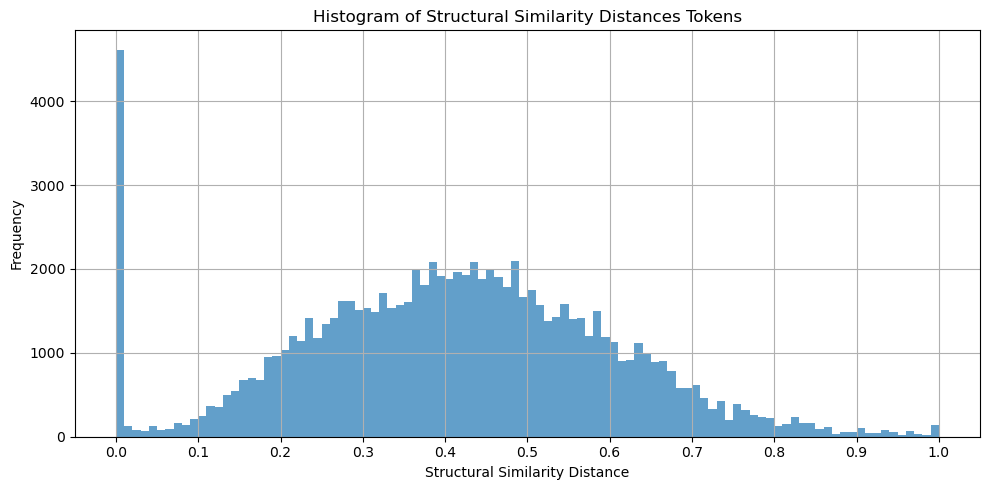

In [7]:
# plot histogram of structural_similarity_distances_tokens
plt.figure(figsize=(10, 5))
plt.hist(structural_similarity_distances, bins=100, alpha=0.7)
plt.title('Histogram of Structural Similarity Distances Tokens')
plt.xlabel('Structural Similarity Distance')
plt.ylabel('Frequency')
plt.xticks(np.arange(0, 1.1, 0.1))
plt.grid(True)
plt.tight_layout()
plt.show()

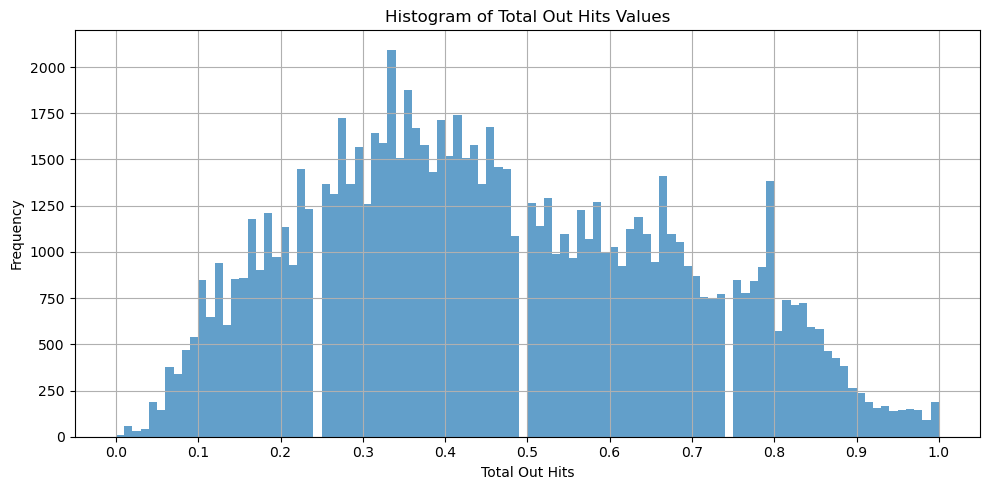

In [8]:
# Total Out Hits
total_out_hits = dataset.decoding_controls[:, 0].numpy()
plt.figure(figsize=(10, 5))
plt.hist(total_out_hits, bins=100, alpha=0.7)
plt.title('Histogram of Total Out Hits Values')
plt.xlabel('Total Out Hits')
plt.ylabel('Frequency')
plt.xticks(np.arange(0, 1.1, 0.1))
plt.grid(True)
plt.tight_layout()
plt.show()



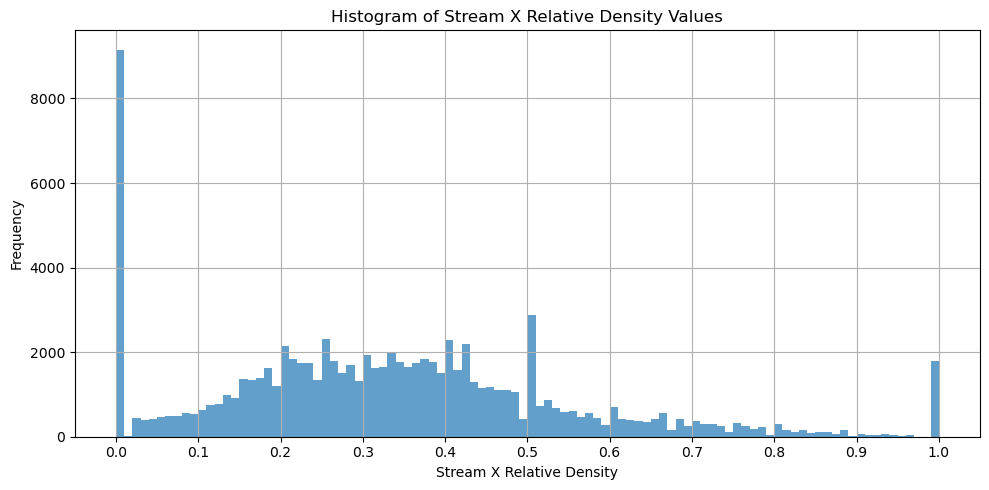

In [19]:
# Stream 3 Relative Histogram
stream_3_relative_density = dataset.decoding_controls[:, 3].numpy()
plt.figure(figsize=(10, 5))
plt.hist(stream_3_relative_density, bins=100, alpha=0.7)
plt.title('Histogram of Stream X Relative Density Values')
plt.xlabel('Stream X Relative Density')
plt.ylabel('Frequency')
plt.xticks(np.arange(0, 1.1, 0.1))
plt.grid(True)
plt.tight_layout()
plt.show()

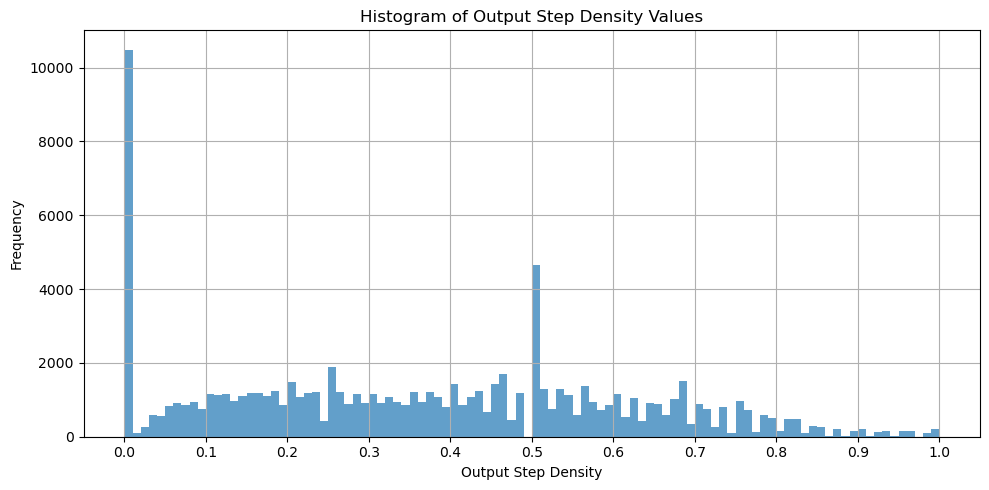

In [20]:
# Output Step Density
output_step_density = dataset.decoding_controls[:, 4].numpy()
plt.figure(figsize=(10, 5))
plt.hist(output_step_density, bins=100, alpha=0.7)
plt.title('Histogram of Output Step Density Values')
plt.xlabel('Output Step Density')
plt.ylabel('Frequency')
plt.xticks(np.arange(0, 1.1, 0.1))
plt.grid(True)
plt.tight_layout()
plt.show()



In [21]:
#pair decoding control values, and plot histogram of each pair
import tqdm

paired_values = []
for i in tqdm.trange(len(dataset)):
    paired_values.append(
        (
            np.round(dataset.encoding_control_values[i, 0].item(), 2),
            np.round(dataset.decoding_controls[i, 0].item(), 2),
            np.round(dataset.decoding_controls[i, 1].item(), 2),
            np.round(dataset.decoding_controls[i, 2].item(), 2),
            np.round(dataset.decoding_controls[i, 3].item(), 2),
            np.round(dataset.decoding_controls[i, 4].item(), 2),
        )
    )


100%|██████████| 90106/90106 [00:01<00:00, 46485.25it/s]


In [22]:
# get counts of each pair
from collections import Counter
paired_values_counts = Counter(paired_values)
# sort by token values
print("Structural Similarity Distance, Total Out Hits, Stream 1 Relative Density, Stream 2 Relative Density, Stream 3 Relative Density, Output Step Density")
paired_values_counts, len(paired_values_counts)

Structural Similarity Distance, Total Out Hits, Stream 1 Relative Density, Stream 2 Relative Density, Stream 3 Relative Density, Output Step Density


(Counter({(0.24, 0.79, 0.42, 0.16, 0.42, 0.69): 26,
          (0.24, 0.79, 0.42, 0.42, 0.16, 0.69): 26,
          (0.24, 0.79, 0.16, 0.42, 0.42, 0.69): 26,
          (1.0, 0.33, 1.0, 0.0, 0.0, 0.0): 24,
          (1.0, 0.33, 0.0, 1.0, 0.0, 0.0): 24,
          (1.0, 0.33, 0.0, 0.0, 1.0, 0.0): 24,
          (0.39, 0.12, 1.0, 0.0, 0.0, 0.0): 24,
          (0.39, 0.12, 0.0, 1.0, 0.0, 0.0): 24,
          (0.39, 0.12, 0.0, 0.0, 1.0, 0.0): 24,
          (0.29, 0.79, 0.42, 0.16, 0.42, 0.69): 18,
          (0.29, 0.79, 0.42, 0.42, 0.16, 0.69): 18,
          (0.29, 0.79, 0.16, 0.42, 0.42, 0.69): 18,
          (0.23, 0.79, 0.42, 0.16, 0.42, 0.69): 18,
          (0.23, 0.79, 0.42, 0.42, 0.16, 0.69): 18,
          (0.23, 0.79, 0.16, 0.42, 0.42, 0.69): 18,
          (0.26, 1.0, 0.33, 0.33, 0.33, 1.0): 18,
          (0.25, 1.0, 0.33, 0.33, 0.33, 1.0): 18,
          (0.37, 0.2, 1.0, 0.0, 0.0, 0.0): 18,
          (0.37, 0.2, 0.0, 1.0, 0.0, 0.0): 18,
          (0.37, 0.2, 0.0, 0.0, 1.0, 0.0): 18,
      

In [23]:
# Let's check if Outstep Density changes the number of Relative Density Pairs
#pair decoding control values, and plot histogram of each pair
import tqdm

paired_values_without_step_den = []
paired_values_with_step_den = []

for i in tqdm.trange(len(dataset)):
    paired_values_with_step_den.append(
        (
            np.round(dataset.decoding_controls[i, 1].item(), 2),
            np.round(dataset.decoding_controls[i, 2].item(), 2),
            np.round(dataset.decoding_controls[i, 3].item(), 2),
            np.round(dataset.decoding_controls[i, 4].item(), 2),
        )
    )
    paired_values_without_step_den.append(
        (
            np.round(dataset.decoding_controls[i, 1].item(), 2),
            np.round(dataset.decoding_controls[i, 2].item(), 2),
            np.round(dataset.decoding_controls[i, 3].item(), 2),
        )
    )

100%|██████████| 90106/90106 [00:02<00:00, 41050.37it/s]


In [24]:
n_pairs_without_step_den = len(Counter(paired_values_without_step_den))
n_pairs_with_step_den = len(Counter(paired_values_with_step_den))
print(n_pairs_without_step_den, n_pairs_with_step_den, n_pairs_with_step_den / n_pairs_without_step_den)


7745 31866 4.1143963847643645


In [25]:
# Let's see how much the total out hits changes with the relative densities

paired_values_with_total_out_hits = []

for i in tqdm.trange(len(dataset)):
    paired_values_with_total_out_hits.append(
        (
            np.round(dataset.decoding_controls[i, 0].item(), 2),
            np.round(dataset.decoding_controls[i, 1].item(), 2),
            np.round(dataset.decoding_controls[i, 2].item(), 2),
            np.round(dataset.decoding_controls[i, 3].item(), 2),
        )
    )


100%|██████████| 90106/90106 [00:01<00:00, 72963.27it/s]


In [26]:
n_pairs_with_total_out_hits = len(Counter(paired_values_with_total_out_hits))
print(n_pairs_without_step_den, n_pairs_with_total_out_hits, n_pairs_with_total_out_hits / n_pairs_without_step_den)

7745 24099 3.1115558424790186


In [27]:
# all five
paired_values_all = []

for i in tqdm.trange(len(dataset)):
    paired_values_all.append(
        (
            np.round(dataset.decoding_controls[i, 0].item(), 2),
            np.round(dataset.decoding_controls[i, 1].item(), 2),
            np.round(dataset.decoding_controls[i, 2].item(), 2),
            np.round(dataset.decoding_controls[i, 3].item(), 2),
            np.round(dataset.decoding_controls[i, 4].item(), 2),
        )
    )


100%|██████████| 90106/90106 [00:01<00:00, 57961.56it/s]


In [28]:
n_pairs_all = len(Counter(paired_values_all))
print(n_pairs_without_step_den, n_pairs_all, n_pairs_all / n_pairs_without_step_den)


7745 40661 5.2499677211103934
